# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación y limpieza de datos**<a id='21'></a>

In [3]:
# Librery
from utils.libreries import *

%matplotlib inline 
import warnings

warnings.filterwarnings("ignore")

# Read all csv 

preroot=os.getcwd()
df=pd.read_csv(preroot+'/data/raw/waterQuality.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [5]:
# Transform all object columns to numeric:
df.ammonia=[float(i) if (i!='#NUM!') else np.nan for i in df.ammonia]
df.is_safe=[int(i) if (i!='#NUM!') else np.nan for i in df.is_safe]

In [6]:
df.isna().sum()*100/len(df)

aluminium      0.000000
ammonia        0.037505
arsenic        0.000000
barium         0.000000
cadmium        0.000000
chloramine     0.000000
chromium       0.000000
copper         0.000000
flouride       0.000000
bacteria       0.000000
viruses        0.000000
lead           0.000000
nitrates       0.000000
nitrites       0.000000
mercury        0.000000
perchlorate    0.000000
radium         0.000000
selenium       0.000000
silver         0.000000
uranium        0.000000
is_safe        0.037505
dtype: float64

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

##  **2.2. Feature Engineering**<a id='22'></a>

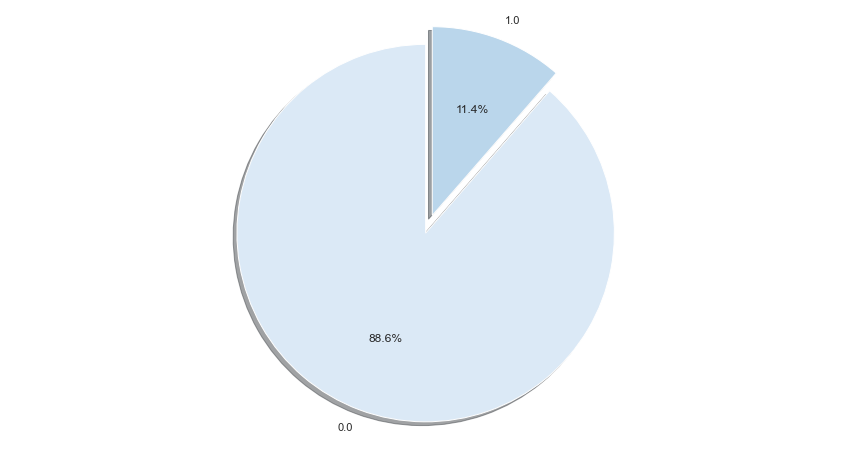

In [63]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = df.is_safe.value_counts().index
sizes = df.is_safe.value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<AxesSubplot:xlabel='is_safe', ylabel='count'>

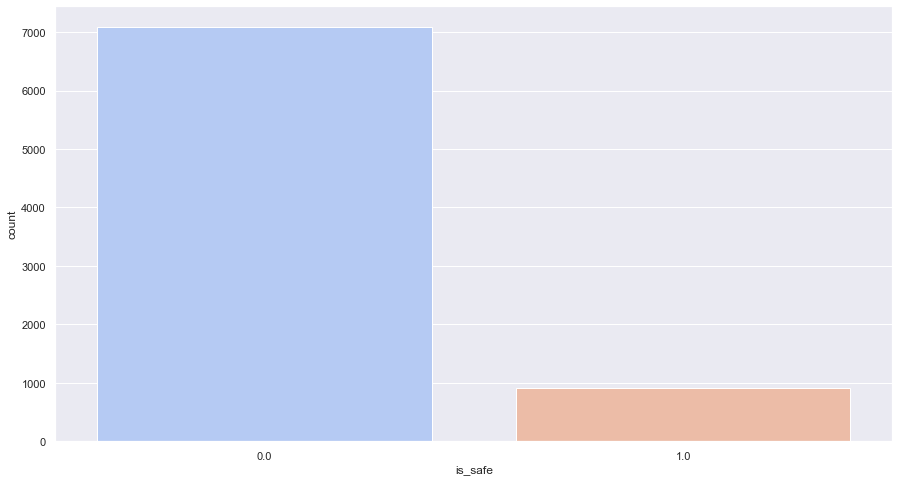

In [64]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x='is_safe',data=df,palette="coolwarm")

**Observaciones:**

- Dataset desbalanceado

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.

Se puede apreciar visualmente a continuación: 

<img src="https://miro.medium.com/max/1400/1*o_KfyMzF7LITK2DlYm_wHw.png" alt="drawing" width="450x500"/>
<img src="https://miro.medium.com/max/1400/1*gHW_PLz7kWrhdl5t1sJRRA.png" alt="drawing" width="450x500"/>
  

En este notebook se pretende tratar los datos para mejorar los modelos que se han comprobado mejores en el notebook anterior `2a_ML_Baseline.ipynb`. 

Se crean dos dataset procesados:
1. Se seleccionan las variables indepedientes más influyentes mediante los métodos no supervisado de **PCA** y **RFE**.
2. Se balancean las variables utilizando el método de resampling: 

    2.1. Oversampling : **SMOTE**

    2.2. Combinación de under y oversampling: **SMOTEENN**
    
    2.3. Selección del método que se considere mejor.

In [65]:
data = df.copy()
target = 'is_safe'
X = data.drop([target], axis=1)

y = data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

***Features selection:***

---

In [66]:
selector = RFE(DecisionTreeClassifier(), n_features_to_select=7, step=1)
selector = selector.fit(X, y)


In [67]:
selector.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True])

In [68]:
selector.ranking_

array([ 1,  1, 14,  3,  1,  8, 10,  9, 13,  6, 12,  5,  1,  7, 11,  1,  1,
        4,  2,  1])

In [69]:
selector.feature_names_in_

array(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium',
       'chloramine', 'chromium', 'copper', 'flouride', 'bacteria',
       'viruses', 'lead', 'nitrates', 'nitrites', 'mercury',
       'perchlorate', 'radium', 'selenium', 'silver', 'uranium'],
      dtype=object)

In [70]:
selector.n_features_to_select

7

In [78]:
df_fselected = df.loc[:,selector.get_feature_names_out()]
df_fselected['is_safe'] = df['is_safe']
df_fselected.to_csv(os.getcwd()+'/data/processed/data_featureselected.csv')
df_fselected

,aluminium,ammonia,cadmium,nitrates,perchlorate,radium,uranium,is_safe
0,1.65,9.08,0.007,16.08,37.75,6.78,0.02,1.0
1,2.32,21.16,0.002,2.01,32.26,3.21,0.05,1.0
2,1.01,14.02,0.008,14.16,50.28,7.07,0.01,0.0
3,1.36,11.33,0.001,1.41,9.12,1.72,0.05,1.0
4,0.92,24.33,0.006,6.74,16.90,2.41,0.02,1.0
...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.040,14.29,3.57,2.13,0.03,1.0
7995,0.05,24.22,0.010,10.27,1.48,1.11,0.08,1.0
7996,0.09,6.85,0.030,15.92,1.35,4.84,0.05,1.0
7997,0.01,10.00,0.000,0.00,0.00,0.00,0.00,1.0


In [53]:
from sklearn.feature_selection import RFECV

Optimal number of features : 7


/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


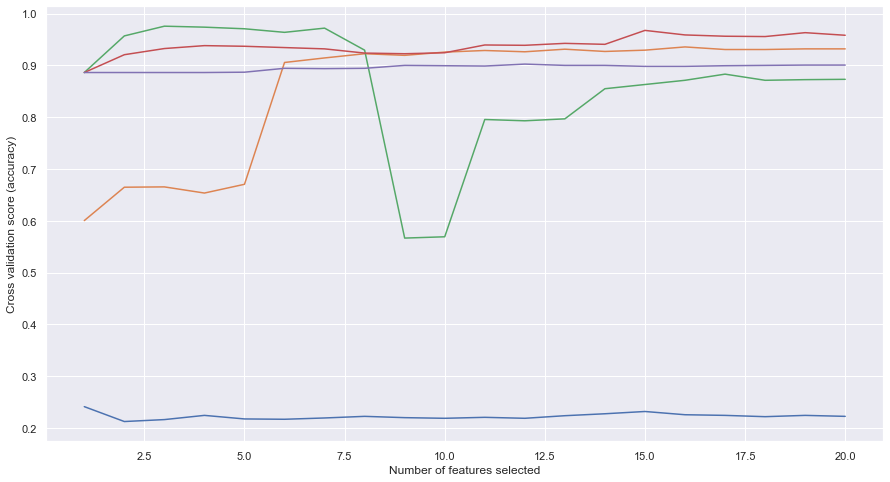

In [54]:
# Create the RFE object and compute a cross-validated score.
xgboost = XGBClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=xgboost,
    step=1,
    
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

***Balancing data:***

---

*`Dataset completo (sin feature selection)`*


In [81]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

Before OverSampling, the shape of train_X: (6396, 20)
Before OverSampling, the shape of train_y: (6396,) 



In [14]:
# Apply Oversampling
sm = SMOTE(random_state = 77) 
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train.ravel()) 

<AxesSubplot:ylabel='count'>

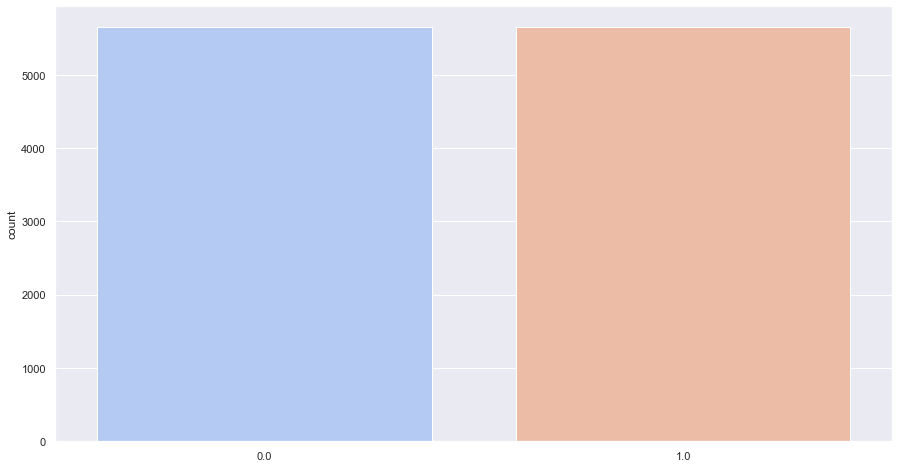

In [15]:
sns.countplot(x=y_train_SMOTE,palette='coolwarm')

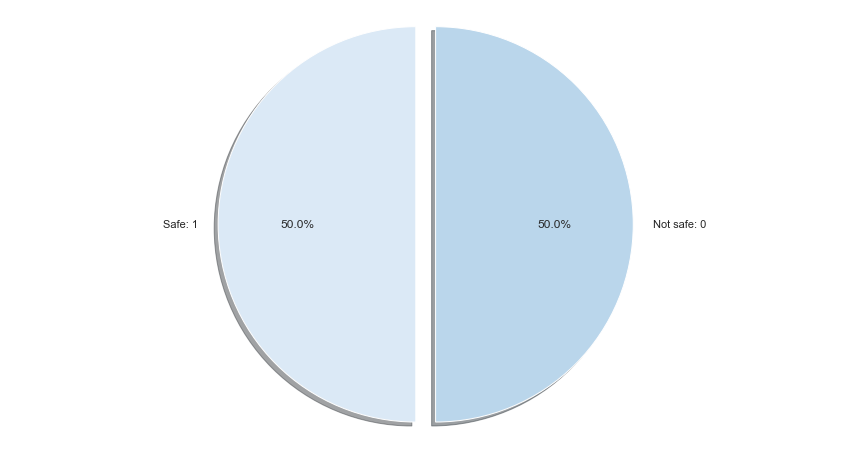

In [16]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Safe: 1','Not safe: 0']
sizes =  [y_train_SMOTE.sum(),len(y_train_SMOTE)-y_train_SMOTE.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [17]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape)) 

After OverSampling, the shape of train_X: (11302, 20)
After OverSampling, the shape of train_y: (11302,) 



In [18]:
# Apply Combining
sm = SMOTEENN(random_state = 77) 
X_train_SMOTEENN, y_train_SMOTEENN = sm.fit_resample(X_train, y_train.ravel()) 

<AxesSubplot:ylabel='count'>

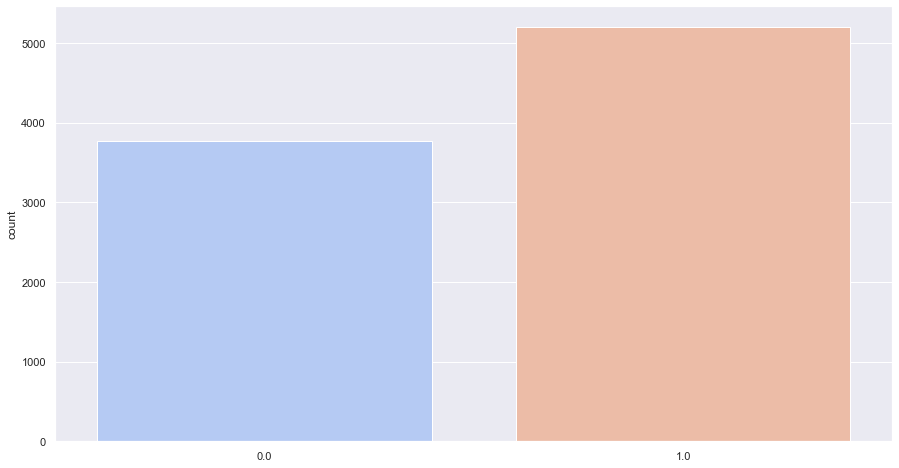

In [19]:
sns.countplot(x=y_train_SMOTEENN,palette='coolwarm')

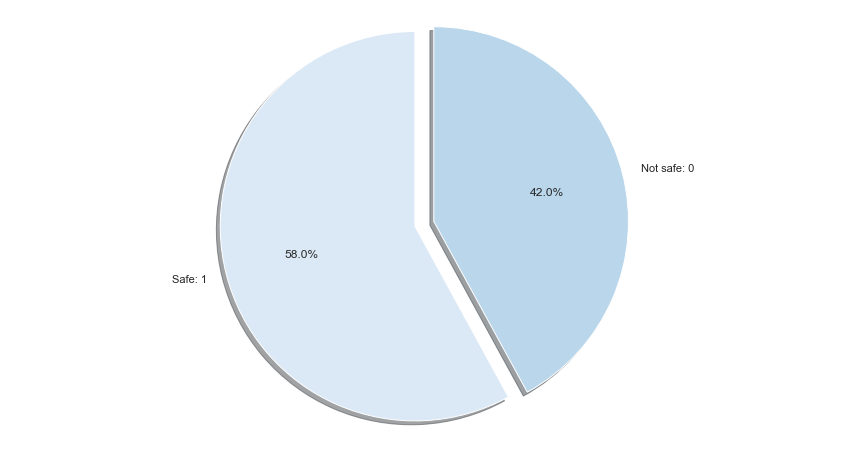

In [20]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Safe: 1','Not safe: 0']
sizes =  [y_train_SMOTEENN.sum(),len(y_train_SMOTEENN)-y_train_SMOTEENN.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [21]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTEENN.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTEENN.shape)) 

After OverSampling, the shape of train_X: (8965, 20)
After OverSampling, the shape of train_y: (8965,) 



In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [49]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1433
         1.0       0.90      0.84      0.87       167

    accuracy                           0.97      1600
   macro avg       0.94      0.91      0.93      1600
weighted avg       0.97      0.97      0.97      1600



In [48]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1433
         1.0       0.85      0.85      0.85       167

    accuracy                           0.97      1600
   macro avg       0.91      0.92      0.91      1600
weighted avg       0.97      0.97      0.97      1600



In [50]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_SMOTEENN,y_train_SMOTEENN)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1433
         1.0       0.68      0.93      0.78       167

    accuracy                           0.95      1600
   macro avg       0.84      0.94      0.88      1600
weighted avg       0.96      0.95      0.95      1600



*`Dataset después del feature selection (7 variables independientes)`*

In [84]:
data_FS = df_fselected.copy()
target = 'is_safe'
X_FS = data_FS.drop([target], axis=1)

y_FS = data_FS[target].copy()

X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_FS, y_FS, test_size = 0.2, random_state = 77)

In [85]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_FS.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train_FS.shape)) 

Before OverSampling, the shape of train_X: (6396, 7)
Before OverSampling, the shape of train_y: (6396,) 



<AxesSubplot:ylabel='count'>

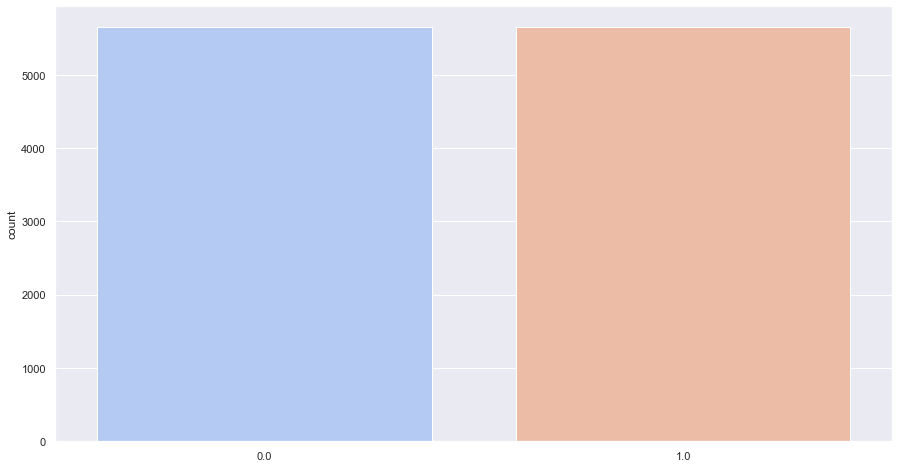

In [86]:
# Apply Oversampling
sm = SMOTE(random_state = 77) 
X_train_FSSMOTE, y_train_FSSMOTE = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

sns.countplot(x=y_train_FSSMOTE,palette='coolwarm')

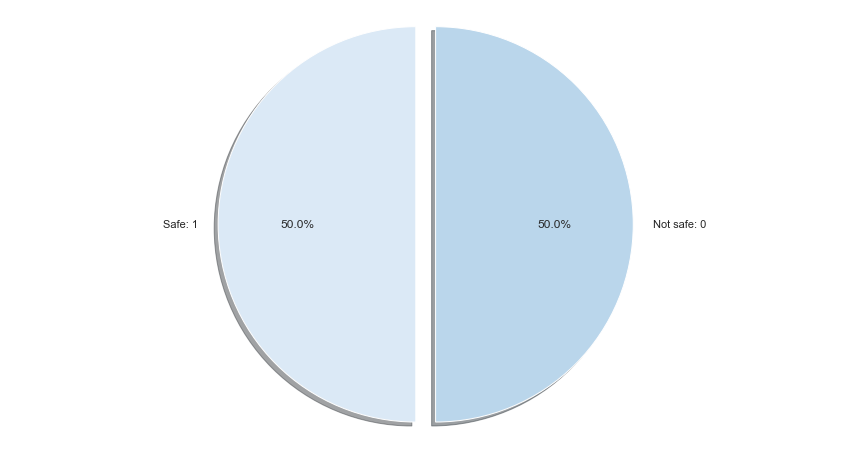

In [87]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Safe: 1','Not safe: 0']
sizes =  [y_train_FSSMOTE.sum(),len(y_train_FSSMOTE)-y_train_FSSMOTE.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [88]:
# Apply Combining
sm = SMOTEENN(random_state = 77) 
X_train_FSSMOTEENN, y_train_FSSMOTEENN = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

<AxesSubplot:ylabel='count'>

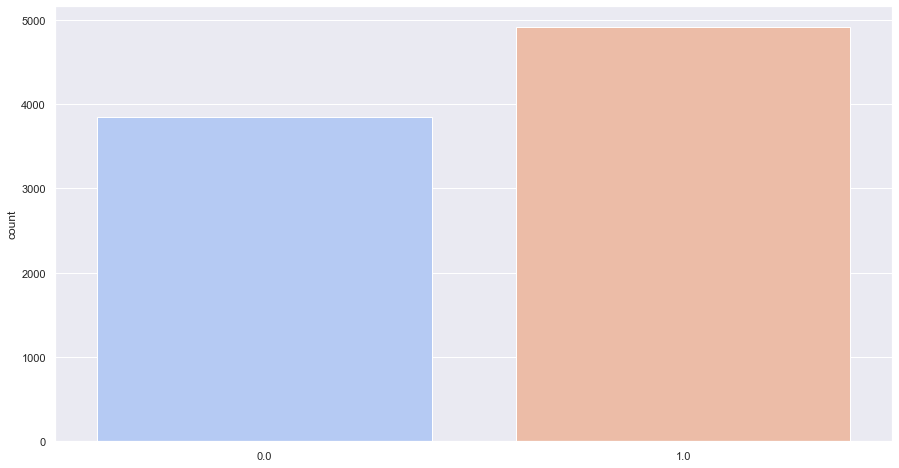

In [89]:
sns.countplot(x=y_train_FSSMOTEENN,palette='coolwarm')

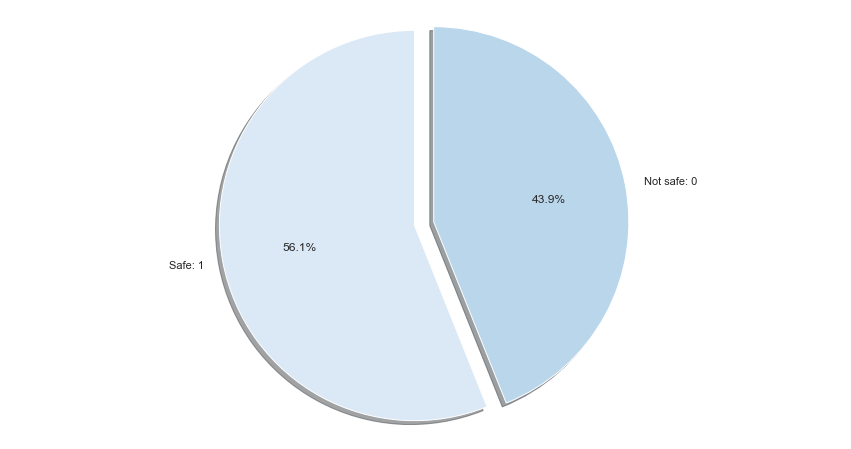

In [90]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Safe: 1','Not safe: 0']
sizes =  [y_train_FSSMOTEENN.sum(),len(y_train_FSSMOTEENN)-y_train_FSSMOTEENN.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [92]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FS,y_train_FS)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1433
         1.0       0.90      0.72      0.80       167

    accuracy                           0.96      1600
   macro avg       0.94      0.85      0.89      1600
weighted avg       0.96      0.96      0.96      1600



In [93]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTE,y_train_FSSMOTE)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1433
         1.0       0.82      0.73      0.77       167

    accuracy                           0.96      1600
   macro avg       0.90      0.86      0.87      1600
weighted avg       0.95      0.96      0.95      1600



In [94]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTEENN,y_train_FSSMOTEENN)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1433
         1.0       0.61      0.80      0.69       167

    accuracy                           0.93      1600
   macro avg       0.79      0.87      0.83      1600
weighted avg       0.94      0.93      0.93      1600



**Observaciones:**

Se puede ver que utilizando como prueba el modelo XGBoostClassifier() las mejores métricas están entre: 

- Dataset completo sin alterar con balanceo ni feature selection: mejores métricas de modo general. 
- Dataset balanceado con SMOTEENN sin la feature selection: mejor precisión, sin embargo disminuyen las otras métricas

**Propuesta:**

- Prueba con ajuste de hiperparámetros para confirmar los datos obtenidos de la prueba general.


##  **2.3. Modelado**<a id='23'></a>

## Baseline con feature selection data:

Se realiza la `prueba general de modelos` para ver cual de ellos tiene las mejores métricas ***habiendo realizado feature selection***. Aún sin aplicarle el balanceo ni el ajuste de parámetros.

In [95]:
modelos = choose_models('all',None,clf = True)

for modelo in list(modelos.keys()):
    metricas,pack = baseline(df_fselected, 'is_safe', base_model = modelos[modelo], clf = True,file_name='baseline_fs_metrics.csv')
    

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'list'>
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved


/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saved
Saved
Saved
Saved


In [128]:
saved_metrics = pd.read_csv('model/model_metrics/baseline_fs_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
saved_metrics

,model,ACC,Precision,Recall,F1,ROC,Jaccard
4,RandomForestClassifier,0.958750,0.917355,0.664671,0.770833,0.828846,0.627119
9,XGBClassifier,0.962500,0.902256,0.718563,0.800000,0.854745,0.666667
10,VotingClassifier,0.957500,0.896000,0.670659,0.767123,0.830793,0.622222
5,BaggingClassifier,0.952500,0.858268,0.652695,0.741497,0.820067,0.589189
7,GradientBoostingClassifier,0.951875,0.846154,0.658683,0.740741,0.822363,0.588235
6,AdaBoostClassifier,0.930625,0.750000,0.502994,0.602151,0.741727,0.430769
0,LogisticRegression,0.903125,0.625000,0.179641,0.279070,0.583540,0.162162
2,DecisionTreeClassifier,0.924375,0.618557,0.718563,0.664820,0.833461,0.497925
11,LinearDiscriminantAnalysis,0.891250,0.472000,0.353293,0.404110,0.653618,0.253219
3,ExtraTreeClassifier,0.885625,0.457895,0.520958,0.487395,0.724540,0.322222


/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


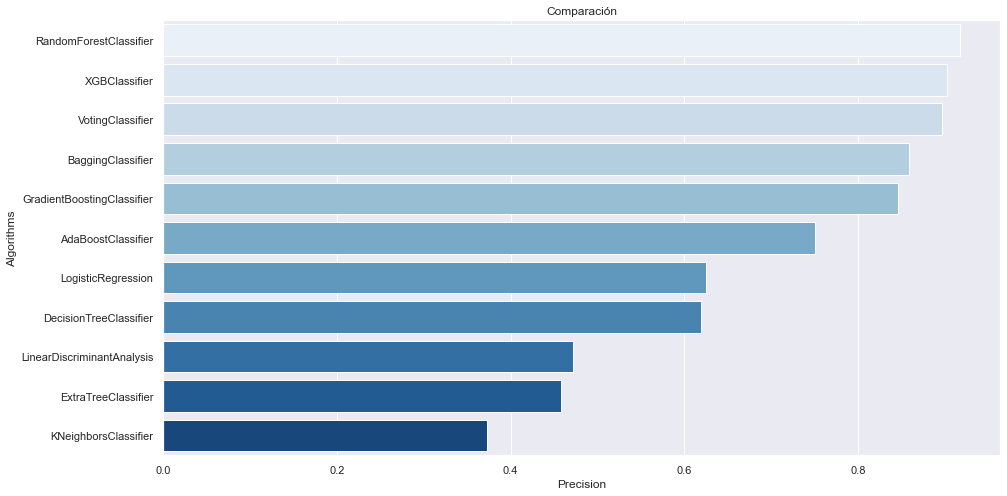

In [130]:
cv_means = saved_metrics['Precision']
cv_means = cv_means[:-1]
lista = saved_metrics['model']
lista = lista[:-1]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,palette='Blues')

cv_plot.set_xlabel("Precision")
cv_plot = cv_plot.set_title("Comparación")

## Ajuste de hiperparámetros:

Con este apartado se pretende `mejorar estimadores` realizando el ***ajuste de hiperparámetros***.  

Se seleccionan los cuatro estimadores que han ido liderando la tabla de métricas y se realiza de nuevo su modelado buscando aquellos parámetros que puedan optimizar el modelo.

- En primer, lugar se ajustan los hiperparámetros utilizando el dataset al que se le ha realizado el feature selection.
- Se ajustan los hiperparámetros con el dataset completo y el balanceo aplicado sobre el mismo con el método SMOTEENN.

In [ ]:
mods = ['RFC','BagC','XGBC','GBC']

for mod in mods:    
    models_generator(df_fselected,'is_safe',choose_models(mod,params=None),choose_params(mod),
    file_name='fs_metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score)})

In [137]:
saved_fs_metrics = pd.read_csv('model/model_metrics/fs_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
saved_fs_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.957500,0.915966,0.652695,0.762238,0.822858,0.615819,model/RandomForestClassifier_1.pkl
1,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.956875,0.908333,0.652695,0.759582,0.822509,0.612360,model/BaggingClassifier_2.pkl
2,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.955000,0.880000,0.658683,0.753425,0.824108,0.604396,model/XGBClassifier_1.pkl
3,GradientBoostingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_d...","{'criterion': 'mse', 'loss': 'log_loss', 'max_...",0.953125,0.848485,0.670659,0.749164,0.828351,0.598930,model/GradientBoostingClassifier_2.pkl


In [9]:
mods = ['RFC','BagC','XGBC','GBC']

for mod in mods:    
    models_generator(df,'is_safe',choose_models(mod,params=None),choose_params(mod),
    file_name='metrics_balanced.csv',dir_file='model/model_metrics',dir_model_file='model',scaling = True,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score)}, balancing = True)

Model RandomForestClassifier saved
Saved
Model BaggingClassifier saved
Saved
Model GradientBoostingClassifier saved
Saved


In [ ]:
saved_balanced_metrics = pd.read_csv('model/model_metrics/metrics_balanced.csv',sep=';').sort_values(by='Precision',ascending=False)
saved_balanced_metrics

## Prueba con Perceptrón:

Se realiza una comprobación de la `posibilidad de usar una red neuronal`, como el perceptrón, para resolver este problema de clasificación.

In [ ]:
from sklearn.neural_network import MLPClassifier
metricas,pack = baseline(df, 'is_safe', base_model = MLPClassifier(), clf = True,file_name='DL_metrics.csv')

In [126]:
from sklearn.neural_network import MLPClassifier
metricas,pack = baseline(df_fselected, 'is_safe', base_model = MLPClassifier(), clf = True,file_name='DL_metrics.csv')

Saved


/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
mlp_metrics = pd.read_csv('model/model_metrics/DL_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
mlp_metrics

,model,ACC,Precision,Recall,F1,ROC,Jaccard
0,MLPClassifier,0.946875,0.788732,0.670659,0.724919,0.824862,0.568528
1,MLPClassifier,0.920000,0.719101,0.383234,0.500000,0.682894,0.333333


Con esta prueba **`no`** se obtienen **`resultados`** *comparativamente* **`mejores`** que con los modelos anteriormente probados. 

Se ajustan los hiperparámetros como última prueba:

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
params_mlp = {
    'activation': ['relu','logistic'],
    'early_stopping': [False,True],
    'hidden_layer_sizes': [(100,),(128,62),(32,)],
    'learning_rate': ['constant','invscaling','adaptive'],
    'learning_rate_init': [0.001,0.0005,0.0001],
    'max_fun': [15000,10000,20000],
    'max_iter': [200,250,100,300],
    'momentum': [0.9,0.8,0.7],
    'solver': ['adam','lbfgs','sgd']
 }


models_generator(df,'is_safe',MLPClassifier(),params_mlp,
file_name ='DL_metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score)})

<a href='3_Resultados.ipynb'>Ver siguiente notebook</a>